# Example usage

Running the FRAGMENT-MNP model is a two-step process. First, the model must be initialised by passing it config and input data. Example config and data is given in the ``fragmentmnp.examples`` module, which is used here. Then the ``FragmentMNP.run()`` method runs the model and returns a ``FMNPOutput`` named tuple with the output data.

In [1]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data
import matplotlib.pyplot as plt
import numpy as np

# Create the model and pass it config and data. minimal_config and
# minimal_data are an examples of a dicts with only required values.
# full_{config|data} are examples of a dicts with all values given
fmnp = FragmentMNP(minimal_config, minimal_data)
# Run the model
output = fmnp.run()

The returned `FMNPOutput` object contains a timeseries `t`, particle mass and number concentrations for each size class, `c` and `n`, particle number concentration lost from each size class due to dissolution `n_diss`, and corresponding concentration of dissolved organics from each size class `c_diss`. We can easily plot these to show model outputs:

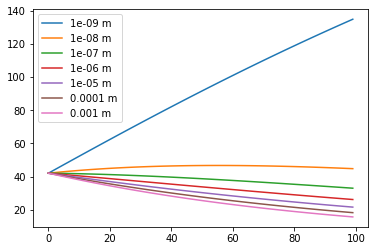

In [2]:
# We transpose the mass concentrations `c` to be able to pass all the
# size classes to matplotlib in one line, but we could just have
# looped through the size classes
plt.plot(output.t, output.c.T)
# fmnp.psd is the particle size distribution used in the model, so we can
# use that to put the size class diameters in the legend
plt.legend([f'{d} m' for d in fmnp.psd])
plt.show()

We can also plot the particle number concentrations `n`. Note the logged y-axis:

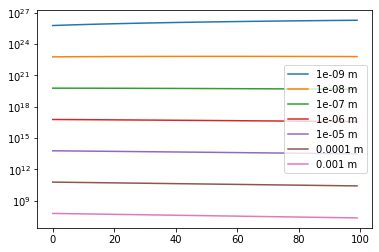

In [3]:
plt.plot(output.t, output.n.T)
plt.yscale('log')
plt.legend([f'{d} m' for d in fmnp.psd])
plt.show()

## Dissolution

The example data has a dissolution rate `k_diss` of 0. Let's simulate dissolution by setting this to an average (median) of 0.001, and use the `k_diss_scaling_method` config parameter set to `surface_area` to scale this by the surface area to volume ratio (the default is `constant`). We will keep `k_diss_gamma` set to the default of 1, such that `k_diss` is directly proportional to surface area to volume ratio.

In [4]:
# Change the dissolution parameters
minimal_data['k_diss'] = 0.0005
minimal_config['k_diss_scaling_method'] = 'surface_area'

# Rerun the model
fmnp = FragmentMNP(minimal_config, minimal_data)
output = fmnp.run()

Dissolution data is included in the `FMNPOutput` class: `n_diss` is a timeseries of particle number concentrations lost from each size class, and `c_diss` is corresponding mass concentration assuming spherical particles. Let's sum the mass concentration across size classes and plot that as well as the particle number concentrations given by `n`:

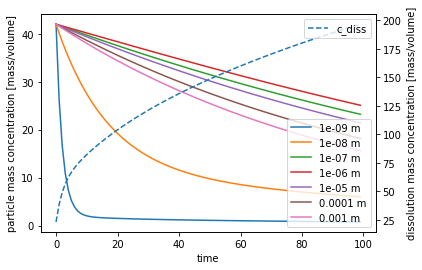

In [5]:
# Create the figure and axes - we need to this because we need to
# add a second axis for the dissolution data
fig, ax1 = plt.subplots()

# Add labels to the particle number concentration axis
ax1.set_xlabel('time')
ax1.set_ylabel('particle mass concentration [mass/volume]')
# Plot the particle number concentrations
ax1.plot(output.t, output.c.T)
ax1.legend([f'{d} m' for d in fmnp.psd], loc='lower right')

# Create and format the dissolution y axis
ax2 = ax1.twinx()
ax2.set_ylabel('dissolution mass concentration [mass/volume]')
ax2.plot(output.t, np.sum(output.c_diss, axis=0), '--')
ax2.legend(['c_diss'], loc='upper right')

# Show the plot
plt.show()